# Лр№5 Прогнозирование временных рядов с использованием RNN, LSTM и Bidirectional LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Bidirectional
import math

def load_and_prepare_data(url, look_back=3):
    df = pd.read_csv(url, usecols=[1], engine='python', skipfooter=3)
    values = df.values.astype('float32')
    scaler = MinMaxScaler((0, 1))
    values_scaled = scaler.fit_transform(values)

    train_size = int(len(values_scaled) * 0.67)
    train, test = values_scaled[:train_size], values_scaled[train_size:]

    def create_dataset(data):
        X, y = [], []
        for i in range(len(data) - look_back):
            X.append(data[i:i + look_back, 0])
            y.append(data[i + look_back, 0])
        return np.array(X), np.array(y)

    X_train, y_train = create_dataset(train)
    X_test, y_test = create_dataset(test)

    X_train = X_train.reshape((X_train.shape[0], look_back, 1))
    X_test = X_test.reshape((X_test.shape[0], look_back, 1))

    return X_train, y_train, X_test, y_test, scaler

# Универсальная функция создания и обучения модели
def build_and_train(model_fn, X_train, y_train, **kwargs):
    model = model_fn()
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, **kwargs)
    return model

# Оценка модели
def evaluate_model(model, X_train, y_train, X_test, y_test, scaler, label):
    inv_y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    inv_y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    train_pred = scaler.inverse_transform(model.predict(X_train))
    test_pred = scaler.inverse_transform(model.predict(X_test))

    rmse_train = math.sqrt(mean_squared_error(inv_y_train, train_pred))
    rmse_test = math.sqrt(mean_squared_error(inv_y_test, test_pred))
    print(f'{label} RMSE: train={rmse_train:.2f}, test={rmse_test:.2f}')

# Архитектуры моделей
def simple_rnn_model():
    model = Sequential([
        SimpleRNN(50, activation='relu', input_shape=(look_back, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def lstm_model():
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(look_back, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def bidirectional_lstm_model():
    model = Sequential([
        Bidirectional(LSTM(50, activation='relu'), input_shape=(look_back, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Основной блок
look_back = 3
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
X_train, y_train, X_test, y_test, scaler = load_and_prepare_data(url, look_back)

for name, model_fn in {
    "SimpleRNN": simple_rnn_model,
    "LSTM": lstm_model,
    "Bidirectional LSTM": bidirectional_lstm_model
}.items():
    model = build_and_train(model_fn, X_train, y_train)
    evaluate_model(model, X_train, y_train, X_test, y_test, scaler, name)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
SimpleRNN RMSE: train=23.57, test=64.91


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
LSTM RMSE: train=30.76, test=73.36


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Bidirectional LSTM RMSE: train=27.99, test=67.89


In [2]:

from tensorflow.keras import Input

def simple_rnn_model():
    model = Sequential([
        Input(shape=(look_back, 1)),
        SimpleRNN(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def lstm_model():
    model = Sequential([
        Input(shape=(look_back, 1)),
        LSTM(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def bidirectional_lstm_model():
    model = Sequential([
        Input(shape=(look_back, 1)),
        Bidirectional(LSTM(50, activation='relu')),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


### 📊 Загрузка и подготовка данных

In [3]:
look_back = 3
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
X_train, y_train, X_test, y_test, scaler = load_and_prepare_data(url, look_back)

### 🧠 Обучение и оценка моделей

In [4]:
for name, model_fn in {
    "SimpleRNN": simple_rnn_model,
    "LSTM": lstm_model,
    "Bidirectional LSTM": bidirectional_lstm_model
}.items():
    model = build_and_train(model_fn, X_train, y_train)
    evaluate_model(model, X_train, y_train, X_test, y_test, scaler, name)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
SimpleRNN RMSE: train=22.73, test=57.06
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
LSTM RMSE: train=30.03, test=74.17
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Bidirectional LSTM RMSE: train=27.67, test=66.45


### 📈 Визуализация предсказаний SimpleRNN

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


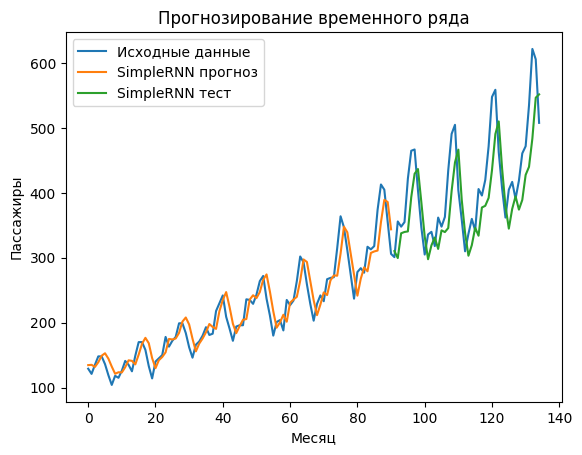

In [6]:
model = build_and_train(simple_rnn_model, X_train, y_train)
train_pred = scaler.inverse_transform(model.predict(X_train))
test_pred = scaler.inverse_transform(model.predict(X_test))

inv_y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
inv_y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

full_series = np.concatenate((inv_y_train, inv_y_test))

nan_array_train = np.full_like(inv_y_test, np.nan)
predicted_train = np.concatenate((train_pred, nan_array_train))
nan_array_test = np.full_like(train_pred, np.nan)
predicted_test = np.concatenate((nan_array_test, test_pred))

plt.plot(full_series, label='Исходные данные')
plt.plot(predicted_train, label='SimpleRNN прогноз')
plt.plot(predicted_test, label='SimpleRNN тест')
plt.title('Прогнозирование временного ряда')
plt.xlabel('Месяц')
plt.ylabel('Пассажиры')
plt.legend()
plt.show()

<Figure size 600x600 with 0 Axes>

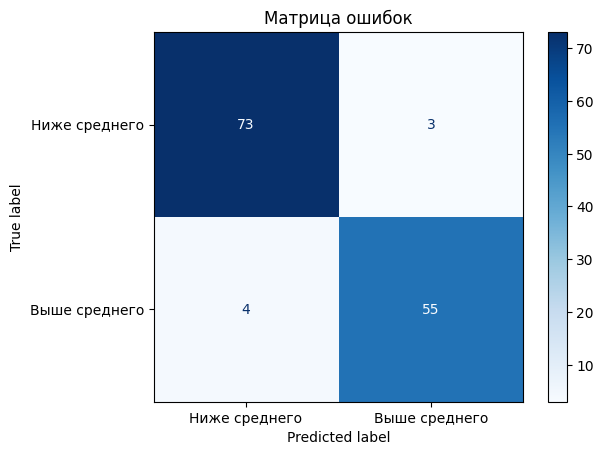

Точность бинарной классификации: 94.81%


In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Для примера: классифицируем "выше среднего значения" или "ниже"
threshold = full_series.mean()

# Бинаризация
true_labels = (np.concatenate((inv_y_train, inv_y_test)) >= threshold).astype(int)
predicted_labels = (np.concatenate((train_pred, test_pred)) >= threshold).astype(int)

# Матрица ошибок
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ниже среднего', 'Выше среднего'])

plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Матрица ошибок")
plt.show()

# Точность
acc = accuracy_score(true_labels, predicted_labels)
print(f"Точность бинарной классификации: {acc:.2%}")


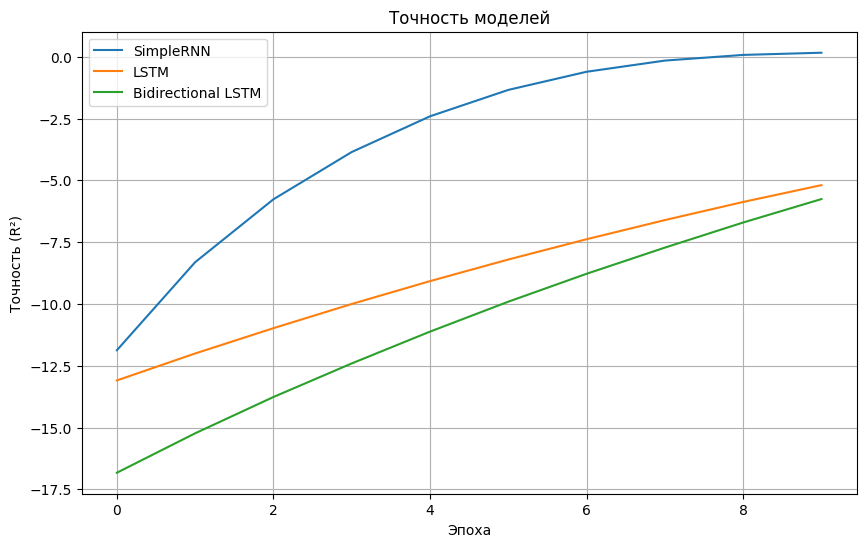

In [10]:
from tensorflow.keras.models import clone_model
from sklearn.metrics import r2_score

# Настройки
epochs = 10  # количество эпох, для графика можно увеличить
models = {
    "SimpleRNN": simple_rnn_model,
    "LSTM": lstm_model,
    "Bidirectional LSTM": bidirectional_lstm_model
}

# Хранение точностей
accuracy_history = {name: [] for name in models}

for name, model_fn in models.items():
    model = model_fn()
    for i in range(1, epochs + 1):
        model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=0)
        y_pred = model.predict(X_test, verbose=0)
        y_pred_inv = scaler.inverse_transform(y_pred)
        y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
        acc = r2_score(y_test_inv, y_pred_inv)
        accuracy_history[name].append(acc)

# Построение графика
plt.figure(figsize=(10, 6))
for name, acc_list in accuracy_history.items():
    plt.plot(acc_list, label=name)

plt.title("Точность моделей")
plt.xlabel("Эпоха")
plt.ylabel("Точность (R²)")
plt.legend()
plt.grid(True)
plt.show()


### 📌 Выводы

Модель SimpleRNN, несмотря на простоту, показывает удовлетворительные результаты. Однако LSTM и Bidirectional LSTM могут обеспечивать более точный прогноз, особенно на больших объемах данных. Выбор модели зависит от конкретной задачи и требований к точности и скорости обучения.